In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
sns.set()

## Logistic Regression

Useful for binary prediction

Supervized learning, since the data is labeled

In [3]:
raw_data = pd.read_csv('db/2.01. Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [4]:
#mapping the data for zeros and ones

data = raw_data.copy()
data['Admitted'] = raw_data['Admitted'].map({'Yes':1,'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


### Graph

With the plot of our variables is clear that a linear regression would not fit the model since the principal of linearity is violated

In [5]:
y = data['Admitted']
x1 = data['SAT']

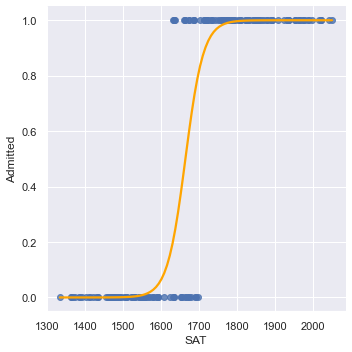

In [6]:
#lmplot with logistic regression line

sns.lmplot(data=data,x='SAT', y='Admitted',
           logistic=True,line_kws={"color": "orange"},ci=None) #ci=None => Removes the shadowed area of the line

### Regression

In [7]:
x = sm.add_constant(x1)
reg_log =sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


### Summary

In [8]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Mon, 13 Mar 2023   Pseudo R-squ.:                  0.7992
Time:                        15:37:56   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

MLE -> Maximun Likelihood estimation

A function which estimates how likely it is that the model describes the real underlying relationships of the variables.

The bigger the likelyhood function, the higher the probability of the model being correct.

Log-Likelihood

The higher this value, the better (it is usually negative)

### Binary prediction

In [9]:
raw_data = pd.read_csv('db/2.02. Binary predictors.csv')
raw_data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [12]:
#Mapping the variables

data1 = raw_data.copy()
data1['Admitted'] = raw_data['Admitted'].map({'Yes':1,'No':0})
data1['Gender'] = raw_data['Gender'].map({'Male':1,'Female':0})
data1

,SAT,Admitted,Gender
0,1363,0,1
1,1792,1,0
2,1954,1,0
3,1653,0,1
4,1593,0,1
...,...,...,...
163,1722,1,0
164,1750,1,1
165,1555,0,1
166,1524,0,1


In [19]:
#variables

y = data1['Admitted']
x1 = data1[['Gender','SAT']]

In [46]:
#regression

x = sm.add_constant(x1)
results_log = sm.Logit(y,x).fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Mon, 13 Mar 2023   Pseudo R-squ.:                  0.8249
Time:                        16:31:47   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.4040     16.321     -4.068      0.000     -98.394     -34.414
Gender        -1.9449      0.846     -2.299      0.022      -3.603      -0.287
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [47]:
np.exp(-1.9449) 

#the odds of a man being admitted are 0.143 times the odds of a female being admitted, ,so females have more chance of entering even when SAT is considered

0.14300152277538664

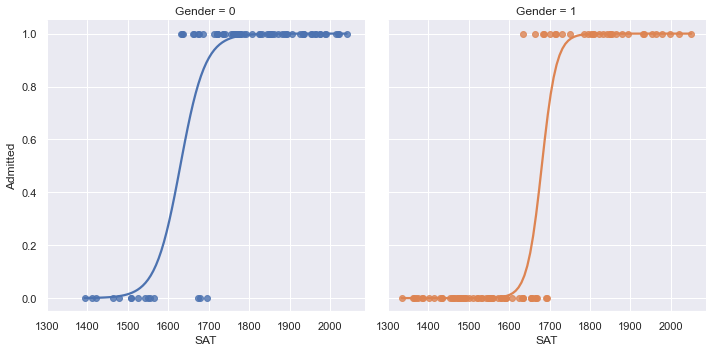

In [48]:
sns.lmplot(data=data1,x='SAT',y='Admitted', 
           col='Gender',hue='Gender',
           logistic=True, ci=None)

### Calculating Accuracy

In [49]:
np.set_printoptions(formatter={'float':lambda x: '{0:0.2f}'.format(x)}) #formatting the values

results_log.predict() #all predicted values

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [50]:
np.array(data["Admitted"]) #actual values

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

Confusion Matrix

In [51]:
#summarizing both

results_log.pred_table()

#creating a dataframe with the results

cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0', 1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


Accuracy

In [52]:
#calculating the accuracy based on the confusion matrix
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum() # correct results divided by the total 
accuracy_train

0.9464285714285714

### Underfitting vc Overfitting

Underfitting -> the model has not captured the underlying logic of the data and ths have low accuracy

Overfitting -> the model focused so much on the training set that is no longer precise on the prediction of data other than the test data itself